### *Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
plt.style.use('ggplot') 

In [2]:
#Importing UCI Dataset
from MakeDataset import *

Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)
[[[ 0.9736077  -0.1844755  -0.2821974 ]
  [ 0.9760866  -0.1867793  -0.2848794 ]
  [ 0.977865   -0.191836   -0.2891687 ]
  ...
  [ 0.9779202  -0.1834941  -0.2829651 ]
  [ 0.9796224  -0.1832831  -0.279844  ]
  [ 0.9775468  -0.1833646  -0.2764387 ]]

 [[ 1.00564    -0.1732591  -0.2299191 ]
  [ 1.006267   -0.1727248  -0.2516695 ]
  [ 1.004331   -0.1783138  -0.2447012 ]
  ...
  [ 0.9963187  -0.165975   -0.2166365 ]
  [ 0.998345   -0.1662256  -0.2176124 ]
  [ 1.00105    -0.1642913  -0.2210956 ]]

 [[ 0.784794   -0.2597323  -0.2317497 ]
  [ 0.8028195  -0.2151319  -0.2276441 ]
  [ 0.7250539  -0.2064177  -0.2095281 ]
  ...
  [ 0.6540971  -0.140727   -0.2860766 ]
  [ 0.6268603  -0.2748843  -0.2455943 ]
  [ 0.6052588  -0.3292142  -0.1952567 ]]

 ...

 [[ 1.013856   -0.08463204 -0.1833906 ]
  [ 1.018295   -0.08470217 -0.1755404 ]
  [ 1.017008   -0.08552211 -0.1765002 ]
  ...
  [ 1.009988   -0

In [3]:
# Dataset Given
# X_train , y_train
# X_test  , y_test
# X_val   , y_val 
# X_merged, y_merged --> train + validation.

#Merging X_train and X_val dataset
X_merged = np.concatenate((X_train, X_val), axis=0)
y_merged = np.concatenate((y_train, y_val), axis=0)
# print(y_merged.shape)

In [4]:
X_merged.shape

(144, 500, 3)

In [5]:
# Define activity classes
# Walking          -->     1
# Walking Upstairs -->     2
# Walking Downstairs -->   3
# Sitting          -->     4
# Standing         -->     5
# Laying           -->     6
activity_classes = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']


#### *Plot of the waveform of the mean acceleration of X direction for each activity class*

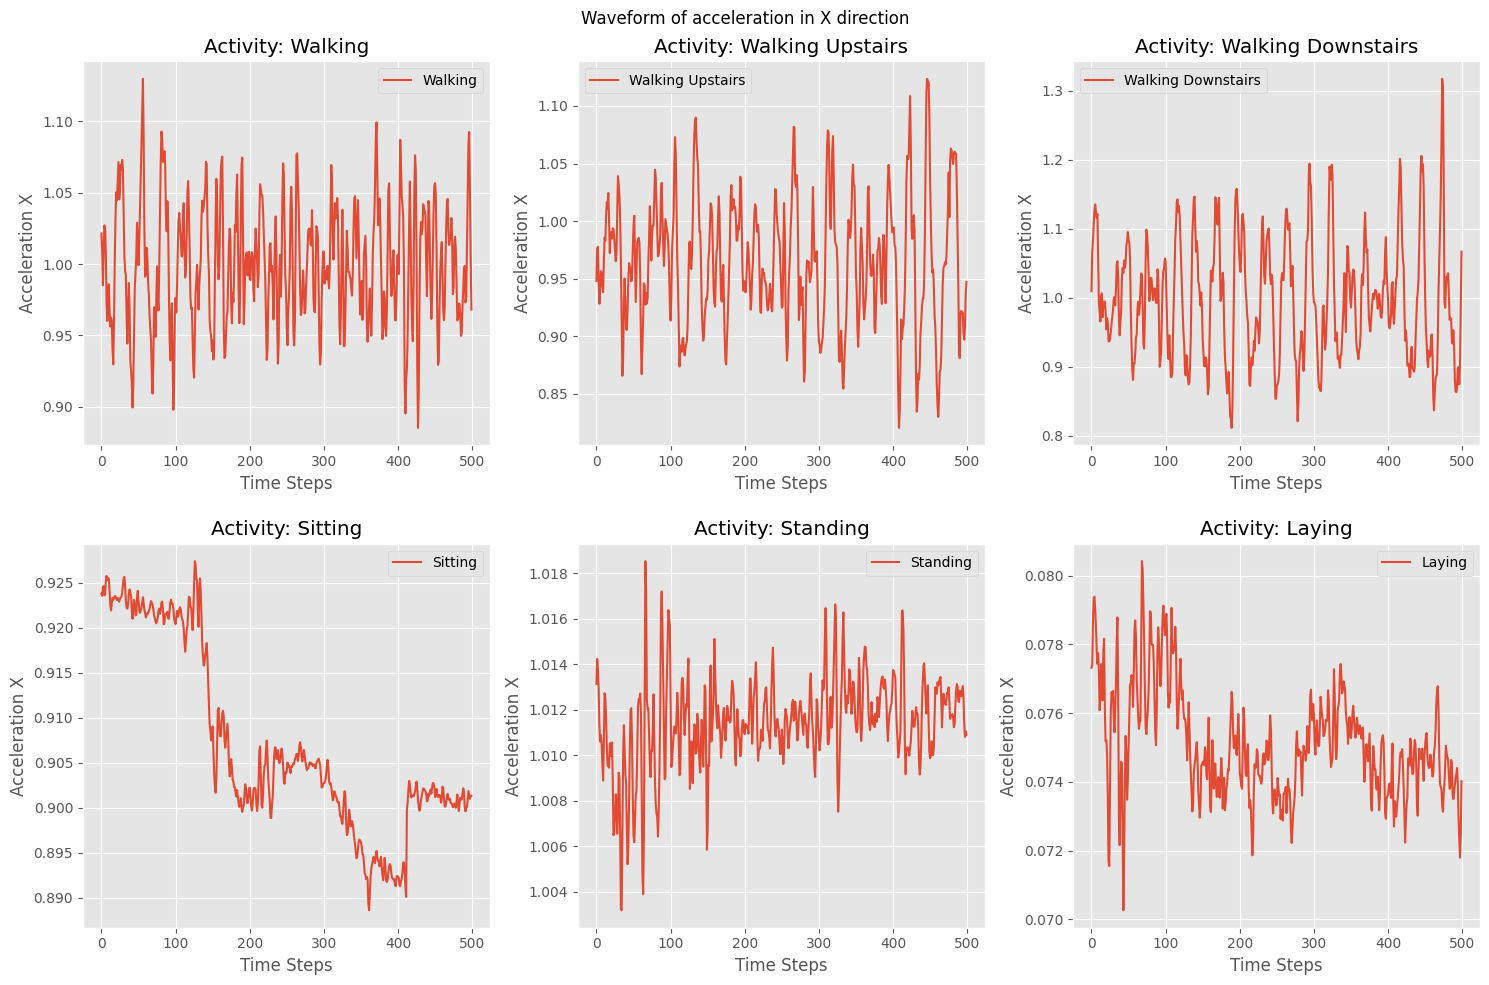

In [6]:
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    class_indices = np.where(y_train == i+1)[0]
    activity_data = X_train[class_indices][:, :500, 0] 
    plt.plot(np.mean(activity_data, axis=0), label=f'{activity_classes[i]}')
    plt.title(f'Activity: {activity_classes[i]}')
    plt.xlabel('Time Steps')
    plt.ylabel('Acceleration X')
    plt.suptitle("Waveform of acceleration in X direction")
    plt.tight_layout(h_pad=2)
    plt.savefig("Acc_X_subplot",dpi=300)
    plt.legend()

#### *Plot of the waveform of the mean acceleration of Y direction for each activity class*

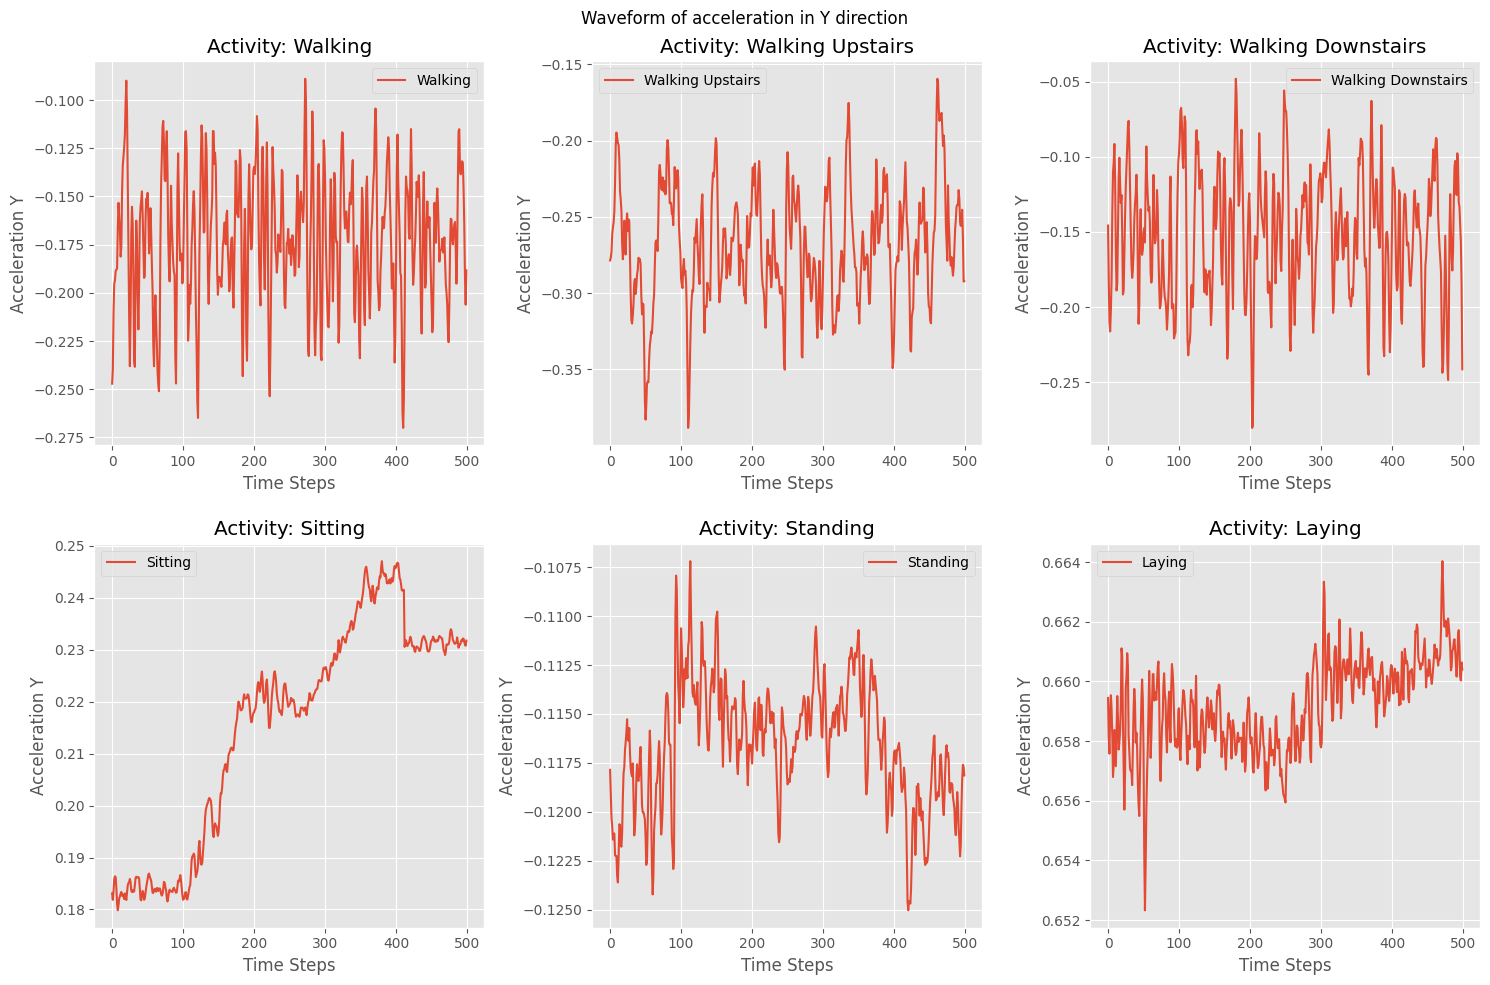

In [7]:
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    class_indices = np.where(y_train == i+1)[0]
    activity_data = X_train[class_indices][:, :500, 1] 
    plt.plot(np.mean(activity_data, axis=0), label=f'{activity_classes[i]}')
    plt.title(f'Activity: {activity_classes[i]}')
    plt.xlabel('Time Steps')
    plt.ylabel('Acceleration Y')
    plt.tight_layout(h_pad=2)
    plt.suptitle("Waveform of acceleration in Y direction")
    plt.savefig("Acc_Y_subplot",dpi=300)
    plt.legend()



#### *Plot of the waveform of the mean acceleration of Z direction for each activity class*

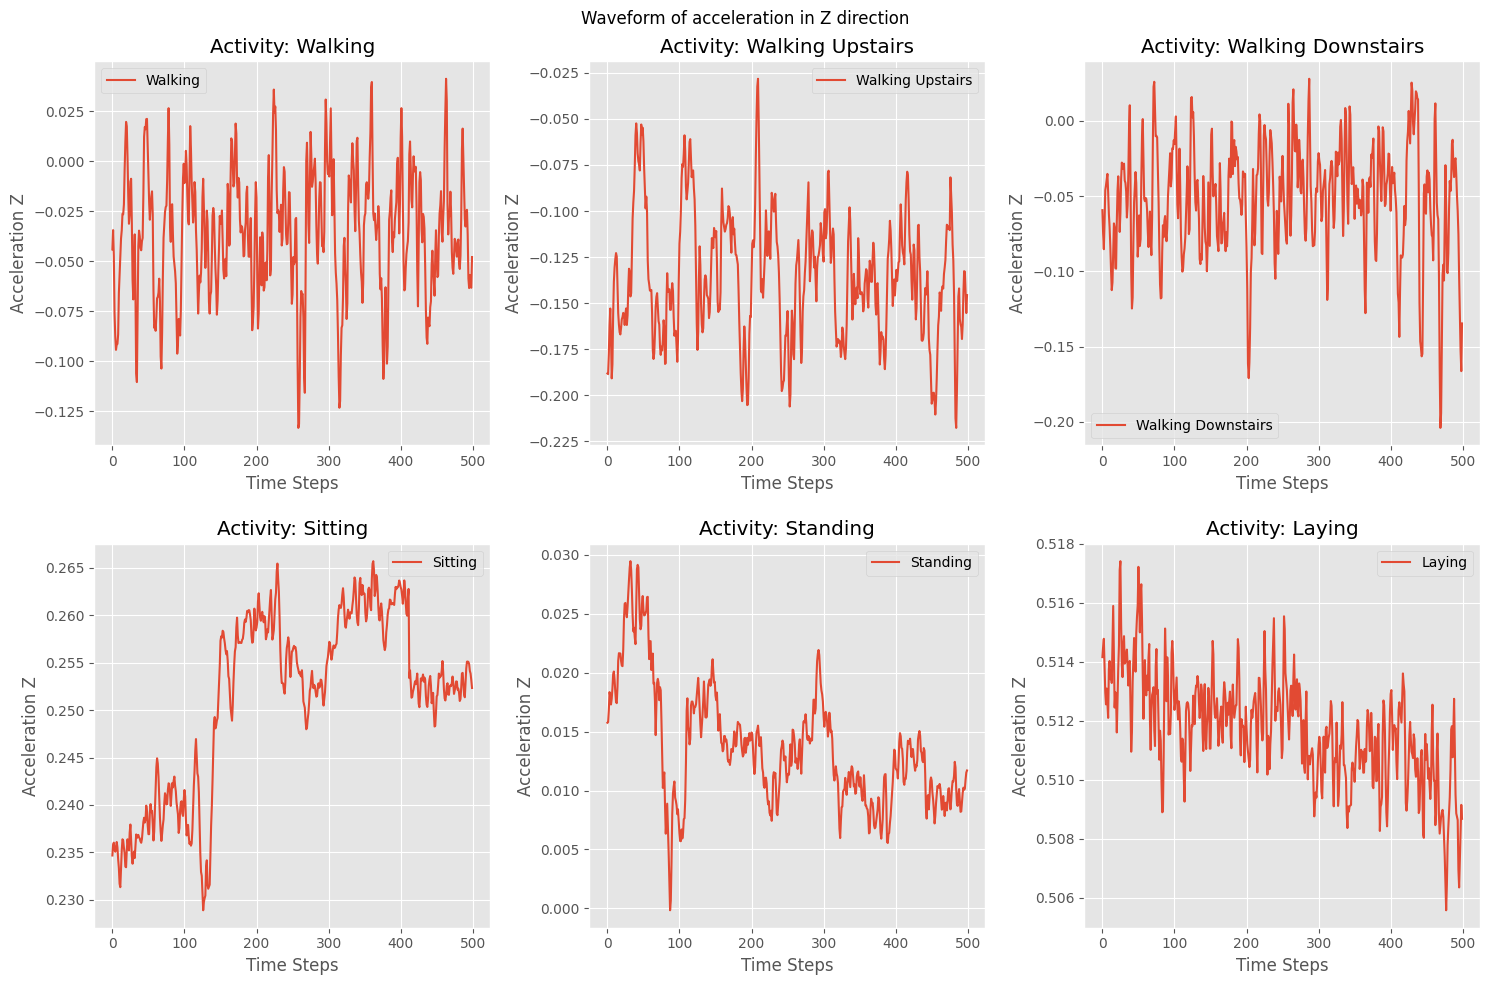

In [8]:
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    class_indices = np.where(y_train == i+1)[0]
    activity_data = X_train[class_indices][:, :500, 2] 
    plt.plot(np.mean(activity_data, axis=0), label=f'{activity_classes[i]}')
    plt.title(f'Activity: {activity_classes[i]}')
    plt.xlabel('Time Steps')
    plt.tight_layout(h_pad=2)
    plt.savefig("Acc_Z_subplot",dpi=300)
    plt.suptitle("Waveform of acceleration in Z direction")
    plt.ylabel('Acceleration Z')
    plt.legend()
plt.show()

#### *Plot of the waveform of the mean acceleration magnitude for each activity class*

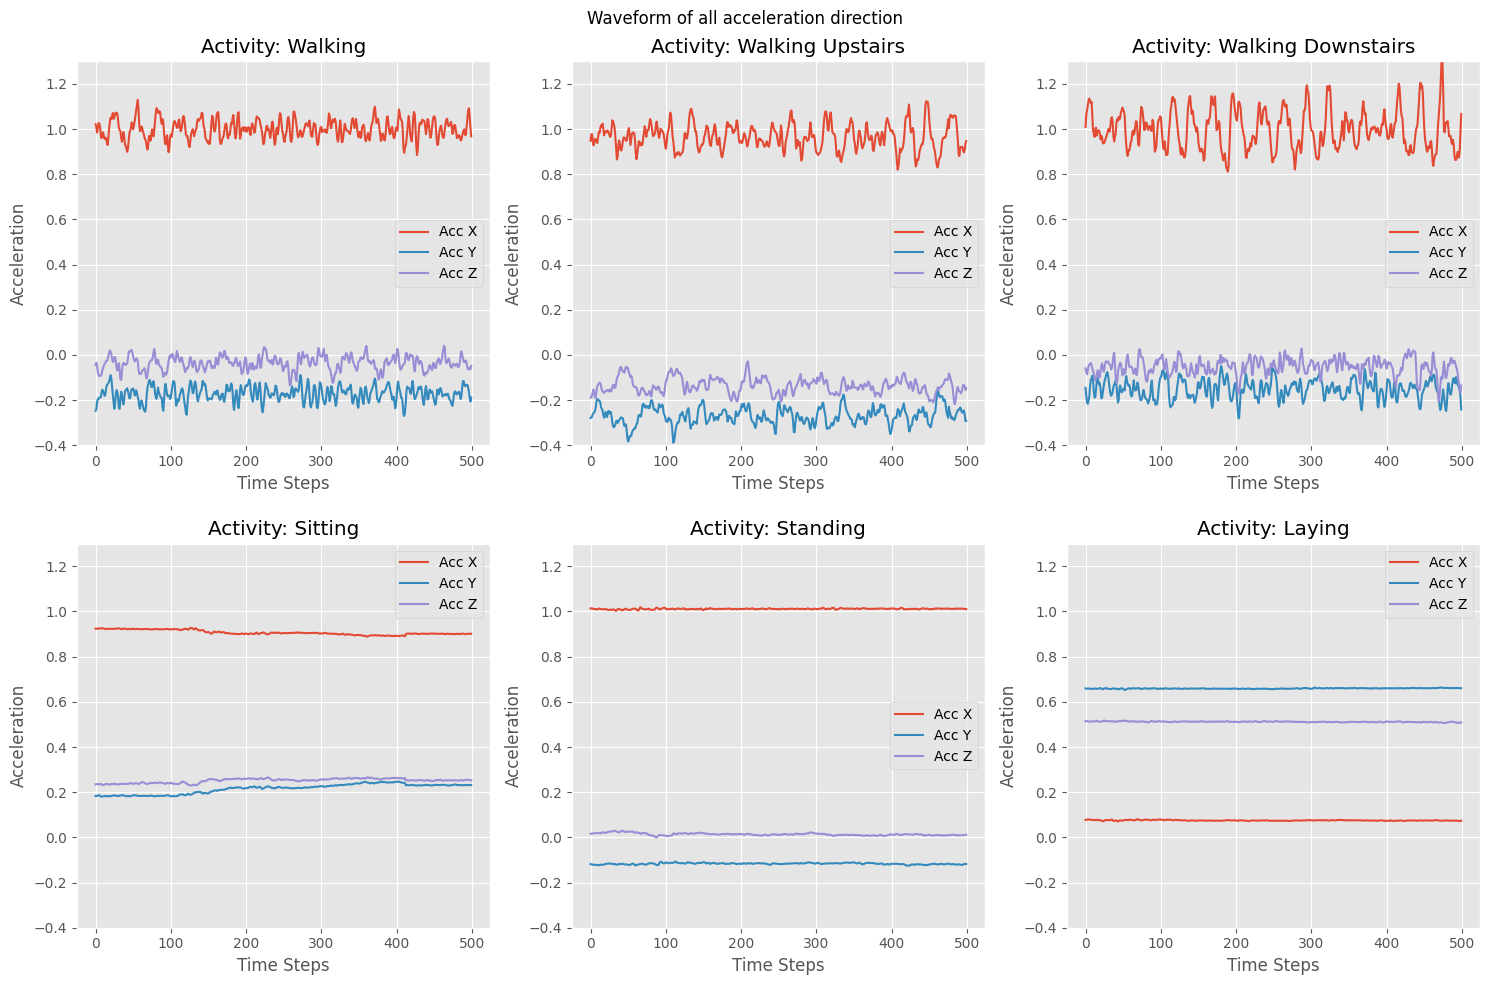

In [9]:
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    class_indices = np.where(y_train == i+1)[0]
    activity_data_X = X_train[class_indices][:, :500, 0]  
    activity_data_Y = X_train[class_indices][:, :500, 1] 
    activity_data_Z = X_train[class_indices][:, :500, 2]  
    plt.plot(np.mean(activity_data_X, axis=0), label="Acc X")
    plt.plot(np.mean(activity_data_Y, axis=0), label="Acc Y")
    plt.plot(np.mean(activity_data_Z, axis=0), label="Acc Z")
    plt.title(f'Activity: {activity_classes[i]}')
    plt.xlabel('Time Steps')
    plt.ylim((-0.4,1.3))
    plt.tight_layout(h_pad=2)
    plt.suptitle("Waveform of all acceleration direction")
    plt.savefig("Acc_XYZ_subplot",dpi=300)
    plt.ylabel('Acceleration')
    plt.legend()
plt.show()

- From the above plots, it's observed that dynamic activities (walking, walking upstairs, and walking downstairs) exhibit higher fluctuations in acceleration compared to static activities (sitting, standing, and laying), which show minimal fluctuations. This difference should visually apparent in the total acceleration plots across activities: dynamic activities display significant variations over time, while static activities maintain nearly constant acceleration.

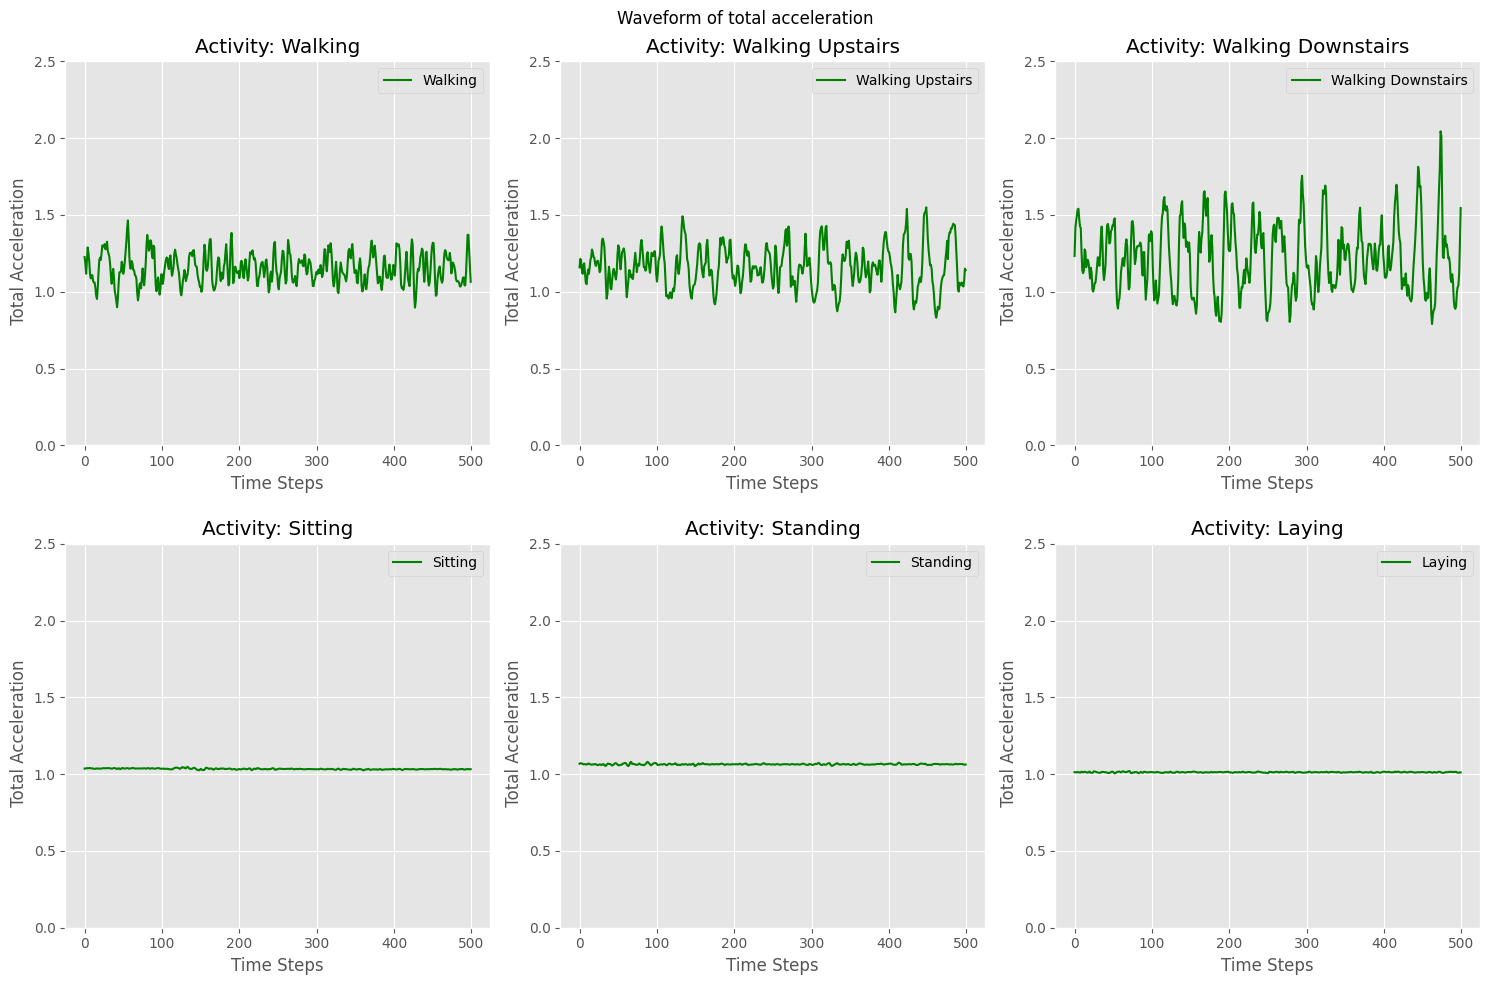

In [10]:
# Total/ Linear accelaration plot
plt.figure(figsize=(15, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    class_indices = np.where(y_train == i+1)[0]
    x= X_train[class_indices][:, :500, 0]
    y= X_train[class_indices][:, :500, 1]
    z= X_train[class_indices][:, :500, 2]
    lin_acc=x**2+y**2+z**2                                  #Linear Acceleration
    plt.plot(np.mean(lin_acc, axis=0), label=f'{activity_classes[i]}',c='green')
    plt.ylim(0,2.5)
    plt.title(f'Activity: {activity_classes[i]}')
    plt.xlabel('Time Steps')
    plt.ylabel(' Total Acceleration')
    plt.tight_layout(h_pad=2)
    plt.suptitle("Waveform of total acceleration")
    plt.savefig("Total_acc_subplot",dpi=300)
    plt.legend()
plt.show()

- These distinct patterns suggest that the total acceleration waveform can serve as a discriminative feature for training a machine learning model to classify static versus dynamic activities effectively. However, distinguishing between different types of dynamic activities or static activities among themselves might pose a more challenging task for the model. For instance, walking upstairs and walking downstairs exhibit similar acceleration patterns, making it difficult to differentiate between these two activities based solely on the total acceleration waveform.

- First we will train a machine learning model using the accelerations of different direction as a individual feature so first we will flattern the data and then we will train the model.

In [11]:
# Reshaping the matrix from (_,500,3) --> (_,1500) to matrix to generate 1500 features
X_train_flat = X_train.reshape((-1,1500))
X_test_flat  = X_test.reshape((-1,1500))
X_val_flat   = X_val.reshape((-1,1500))
X_merged_flat   = X_merged.reshape((-1,1500))

### *Cross Validation*

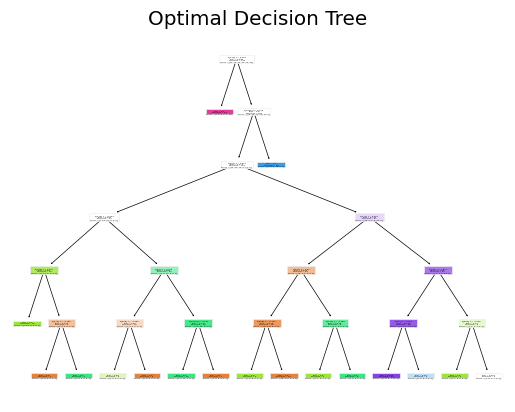

In [18]:
# Varying depths from 2 to 9
depths = list(range(2, 10))

accuracies_val = []

# Train Decision Trees with varying depths
for depth in depths:
    
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train_flat, y_train)
    # Predicting output for X_val
    y_pred_val = dt_classifier.predict(X_val_flat)
    accuracy = accuracy_score(y_val, y_pred_val)
    accuracies_val.append(accuracy)


best_depth=np.argmax(accuracies_val)       # Depth = 6
# Training model over best depth.
dt= DecisionTreeClassifier(max_depth=best_depth,splitter='best')
dt=dt.fit(X_merged_flat, y_merged)
plot_tree(dt,filled=True)
plt.title("Optimal Decision Tree")
plt.savefig("Decision Tree Q3", dpi=1000)
plt.show()

In [15]:
accuracy = dt.score(X_test_flat, y_test)
print("Accuracy of model ",accuracy)

Accuracy of model  0.8333333333333334


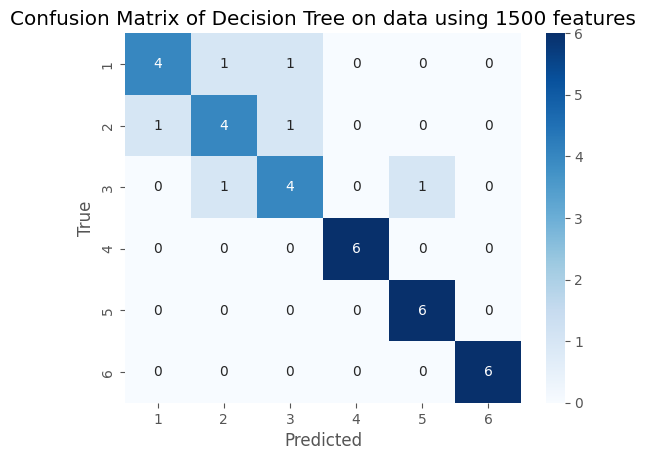

In [17]:
# Predicting output for X_test
y_pred=dt.predict(X_test_flat)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix of Decision Tree on data using 1500 features')
plt.xlabel('Predicted')
plt.savefig("Confusion Matrix of Decision Tree on data using 1500 features", dpi=1000)
plt.ylabel('True')
plt.show()
cm_rawData= cm

Accuracy on test set on models with different depth  [0.4722222222222222, 0.5833333333333334, 0.7222222222222222, 0.75, 0.6944444444444444, 0.8055555555555556, 0.75, 0.75]


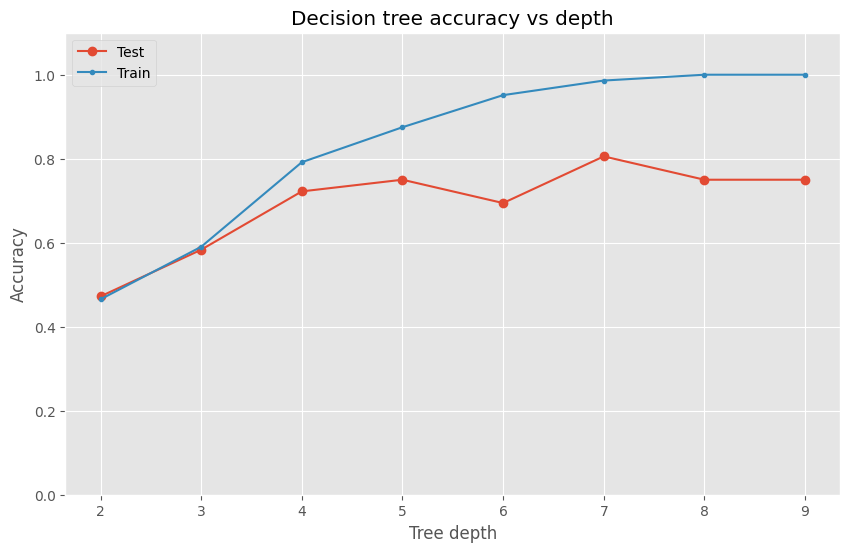

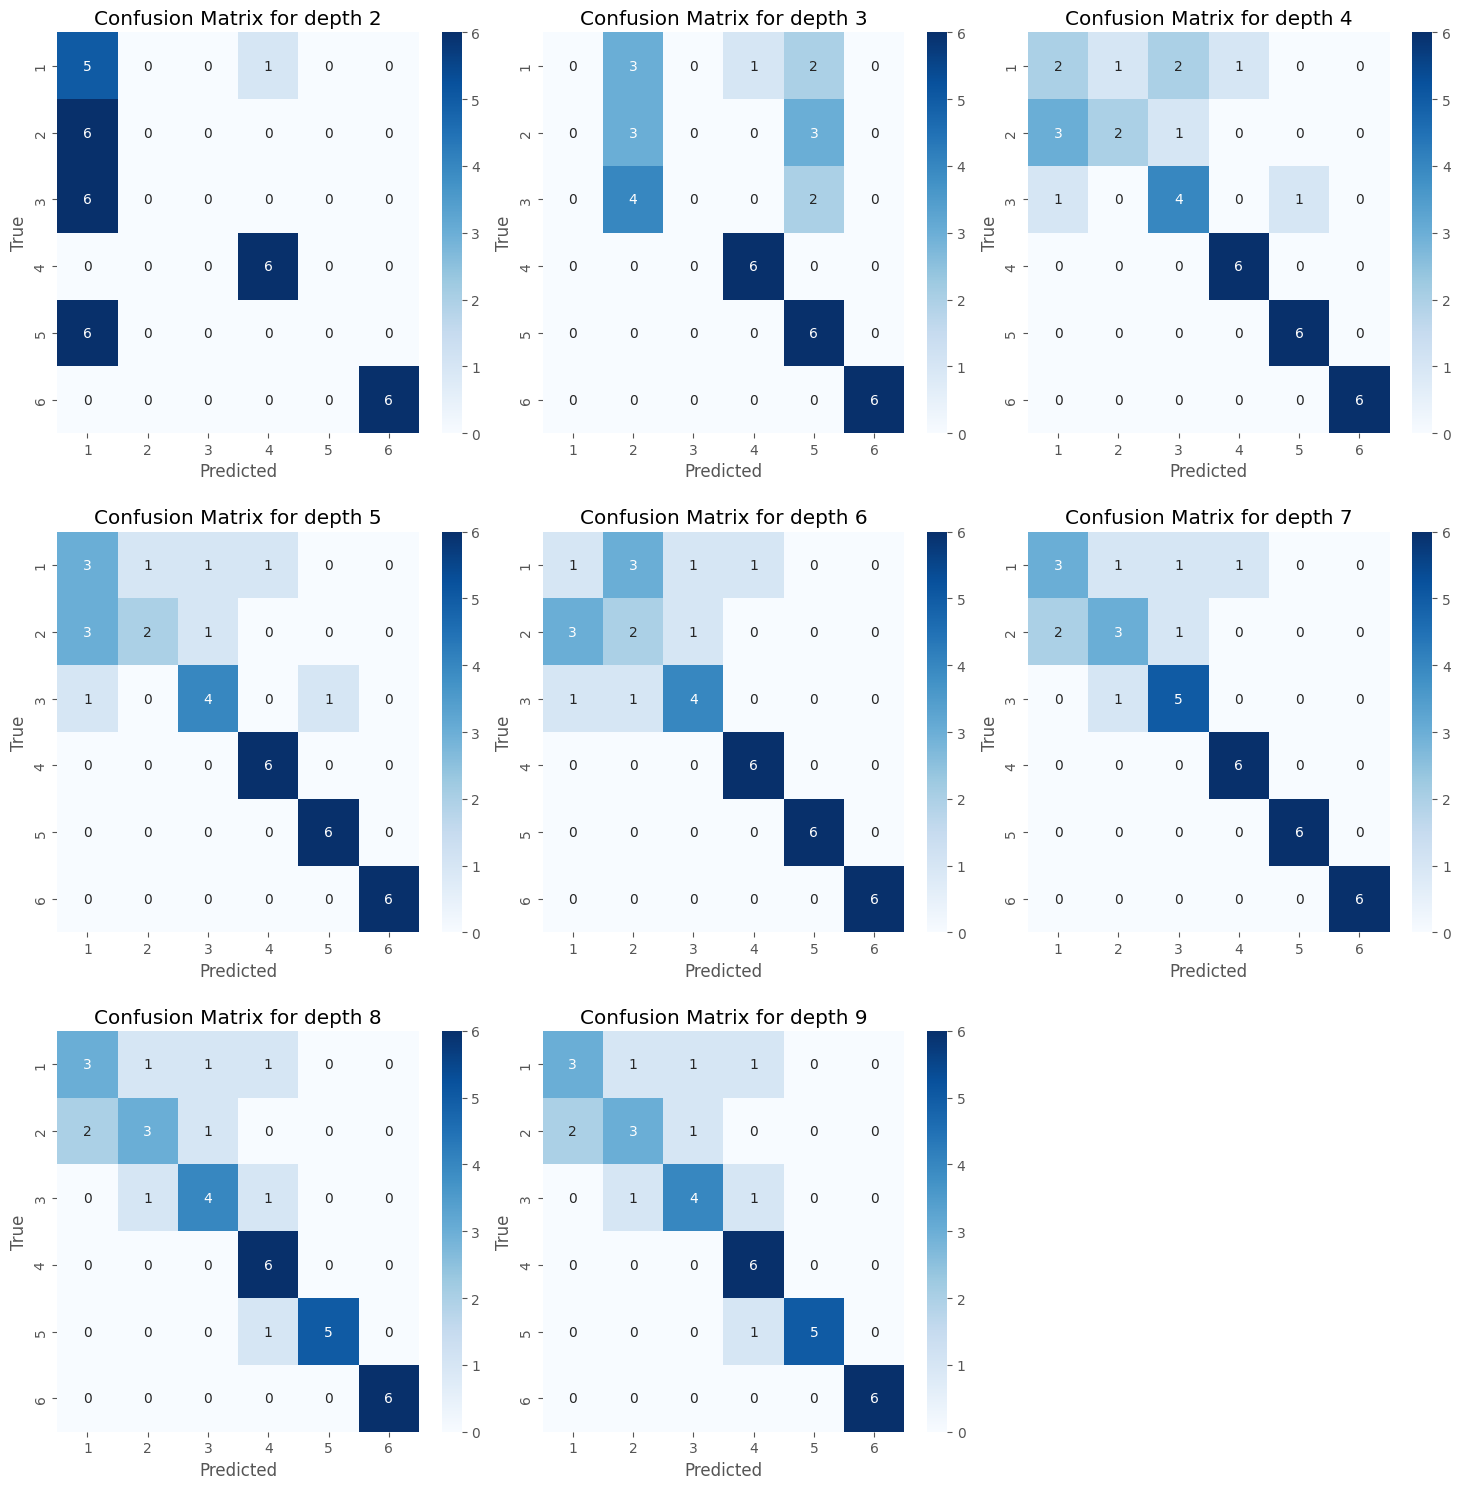

In [19]:
# Varying depths from 2 to 10
depths = list(range(2, 10))

# Lists to store accuracies and confusion matrices
accuracies_test = []
accuracies_train = []
conf_matrices = []

# Train Decision Trees with varying depths
for depth in depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42, splitter='best')
    dt_classifier.fit(X_merged_flat, y_merged)
    
    #Accuracy on test
    y_pred_test = dt_classifier.predict(X_test_flat)
    accuracy = accuracy_score(y_test, y_pred_test)
    accuracies_test.append(accuracy)
    
    #Accuracy on train
    y_pred_train = dt_classifier.predict(X_merged_flat)
    accuracy = accuracy_score(y_merged,y_pred_train)
    accuracies_train.append(accuracy)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    conf_matrices.append(conf_matrix)

# Ploting accuracy Vs Depth plot
accuracy_rawData=accuracies_test
print( "Accuracy on test set on models with different depth " , accuracies_test)
plt.figure(figsize=(10,6))
plt.plot(depths, accuracies_test, marker='o',label="Test")
plt.plot(depths, accuracies_train, marker='.',label="Train")
plt.title('Decision tree accuracy vs depth')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.ylim(0,1.1)
plt.savefig("Accurcy vs Depth Plot Q4", dpi=1000)
plt.legend()
plt.show()

# Ploting subplot of confusion matrix
plt.figure(figsize=(15,15))
for i, depth in enumerate(depths):
    plt.subplot(3,3,i+1)
    sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for depth {i+2}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout(h_pad=2)
plt.savefig("Confusion Subplot Q4")
plt.show()
    

Shape of total_acceleration_2d: (144, 500)


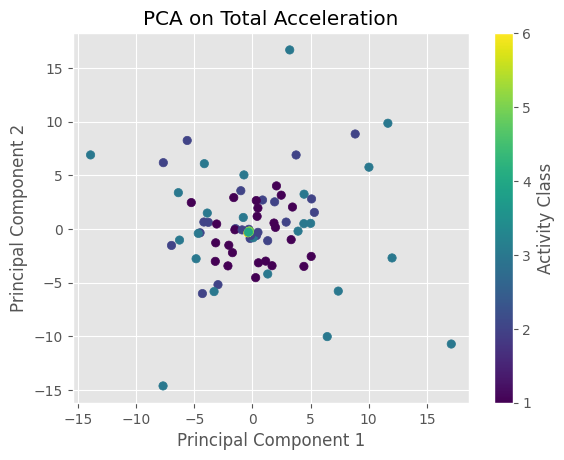

In [21]:
from sklearn.decomposition import PCA
accx = X_merged[:, :, 0]
accy = X_merged[:, :, 1]
accz = X_merged[:, :, 2]

# Evaluting total/linear acceleration
total_acceleration_2d = accx**2 + accy**2 + accz**2
print(f"Shape of total_acceleration_2d: {total_acceleration_2d.shape}")

#Reshaping/Flatening the total_acceleration matrix to (114,500) 
total_acceleration_2d_ = total_acceleration_2d.reshape((144, 500))

# Apply PCA to compress the data into two principal components
pca = PCA(n_components=2)
compressed_data = pca.fit_transform(total_acceleration_2d_)

# Plot a scatter plot to visualize different classes of activities
plt.scatter(compressed_data[:, 0], compressed_data[:, 1], c=y_merged, cmap='viridis')
plt.title('PCA on Total Acceleration')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Activity Class')
plt.show()

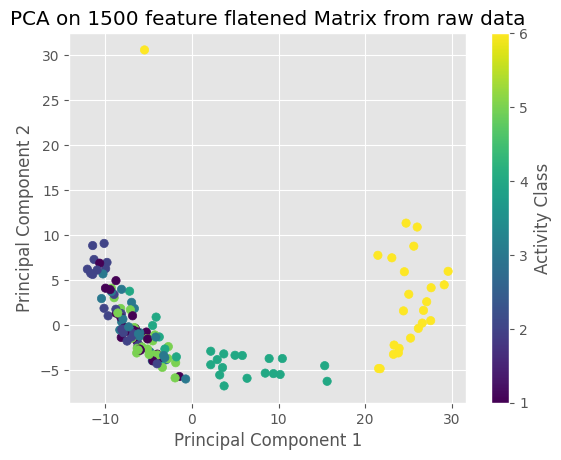

In [22]:
# Performing PCA on 1500 features generated matrix

pca = PCA(n_components=2)
compressed_data_ = pca.fit_transform(X_merged_flat)

plt.scatter(compressed_data_[:, 0], compressed_data_[:, 1], c=y_merged, cmap='viridis')
plt.title('PCA on 1500 feature flatened Matrix from raw data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Activity Class')
plt.show()

- From the above two PCA plots, both the plots we can see that using 1500 features or using total acceleration as a feature it is not possible to separate the classes. So we will use TSFEL library to extract the different types of features such as mean, median, variance, time domain features, frequency domain features which will help us to separate the classes.

In [23]:
# ! pip install tsfel
import tsfel

# Retrieves a pre-defined feature configuration file to extract all available features
cfg = tsfel.get_features_by_domain()
print(total_acceleration_2d.shape)

# Extract features
X_train_extracted = tsfel.time_series_features_extractor(cfg, X_merged.reshape((-1,3)),fs=5,window_size=500)
X_test_extract = tsfel.time_series_features_extractor(cfg, X_test.reshape((-1,3)),fs=5,window_size=500)
print("Shape of extracted matrix ",X_train_extracted.shape)

(144, 500)
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
Shape of extracted matrix  (144, 1152)


In [52]:
print("The features extracted are as follows")
pd.get_option('display.max_columns', 2000)
print(pd.DataFrame(X_train_extracted.columns))
print(X_train_extracted.columns[23])

The features extracted are as follows
                           0
0          0_Absolute energy
1     0_Area under the curve
2          0_Autocorrelation
3            0_Average power
4                 0_Centroid
...                      ...
1147    2_Wavelet variance_5
1148    2_Wavelet variance_6
1149    2_Wavelet variance_7
1150    2_Wavelet variance_8
1151    2_Zero crossing rate

[1152 rows x 1 columns]
0_FFT mean coefficient_100


### *Performing PCA on TSFEL featurized dataset*

In [24]:
pca_tsfel=PCA(n_components=2)
data_new=pca_tsfel.fit_transform(X_train_extracted)
data_new= pd.DataFrame(data_new,columns=["PCA Feature 1", "PCA Feature 2"])

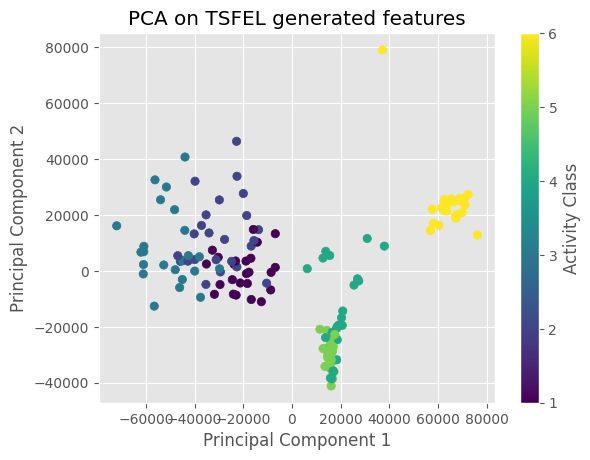

In [25]:
# Ploting scatter plot to visualise TSFEL generated dataset
plt.scatter(data_new.iloc[:, 0],data_new.iloc[:, 1], c=y_merged, cmap='viridis')
plt.title('PCA on TSFEL generated features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Activity Class')
plt.show()

- The scatter plot of PCA applied to a TSFEL-generated featurized matrix demonstrates significantly better clustering of distinct classes compared to PCA on total acceleration, where classes are highly intermixed. The featurized data enables clear distinction between classes, whereas PCA on the 1500-feature matrix only clearly distinguishes classes 4 and 6, and PCA on total acceleration fails to distinguish any class. This highlights the difficulty of creating decision boundaries on total acceleration and the 1500-feature matrix plots. In contrast, featurized data allows for more accurate decision boundaries due to its utilization of hidden statistical patterns in the data.

### *Traning Decision Tree over TSFEL featurized matrix*

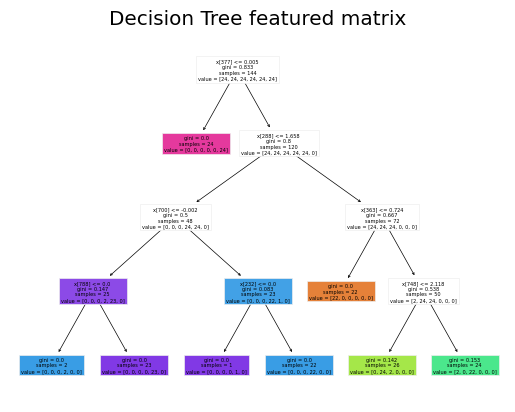

In [27]:
decisionTree=DecisionTreeClassifier(max_depth=4)
decisionTree.fit(X_train_extracted,y_merged)
plot_tree(decisionTree,filled=True)
plt.title("Decision Tree featured matrix")
plt.savefig("Decision Tree featured matrix")

In [28]:
# Predicting output for X_test to calculate accuracy
y_pred= decisionTree.predict(X_test_extract)
accuracy= decisionTree.score(X_test_extract,y_test)
print(accuracy)

0.8333333333333334


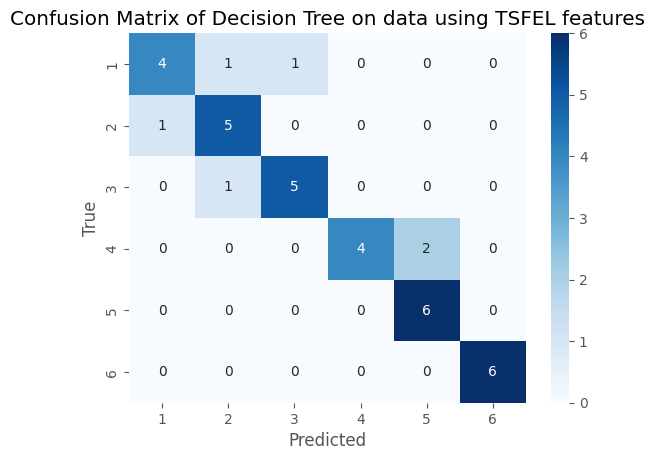

In [29]:
# Ploting confusion matrix to visualise the prediction done by the model
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix of Decision Tree on data using TSFEL features')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
cm_featured=cm

### *Cross Validation*

[0.5, 0.75, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888]


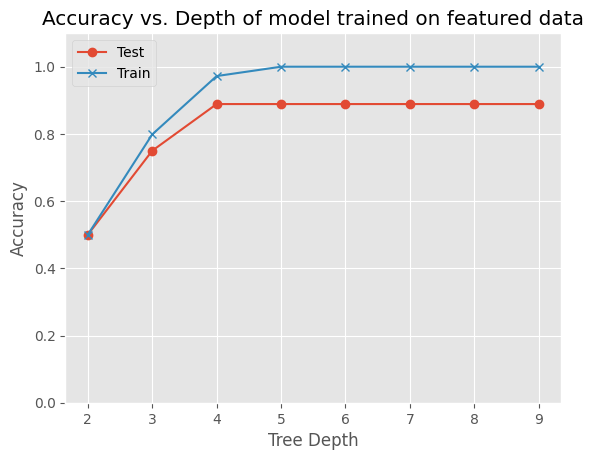

In [30]:
# Varying depths from 2 to 10
depths = list(range(2, 10))

# Lists to store accuracies and confusion matrices
accuracies_test = []
accuracies_train = []
conf_matrices = []

# Train Decision Trees with varying depths
for depth in depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train_extracted, y_merged)
    
    # Accuracy on the test set
    y_pred_test = dt_classifier.predict(X_test_extract)
    accuracy = accuracy_score(y_test, y_pred_test)
    accuracies_test.append(accuracy)
    
    #Accuracy on train set
    y_pred_train = dt_classifier.predict(X_train_extracted)
    accuracy = accuracy_score(y_merged,y_pred_train)
    accuracies_train.append(accuracy)

print(accuracies_test)

plt.plot(depths, accuracies_test, marker='o',label="Test")
plt.plot(depths, accuracies_train, marker='x',label="Train")
plt.title('Accuracy vs. Depth of model trained on featured data')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.ylim(0,1.1)
plt.legend()
plt.show()


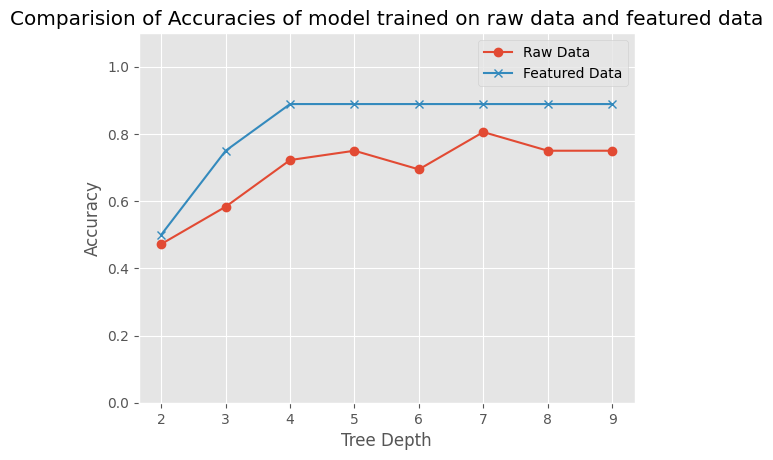

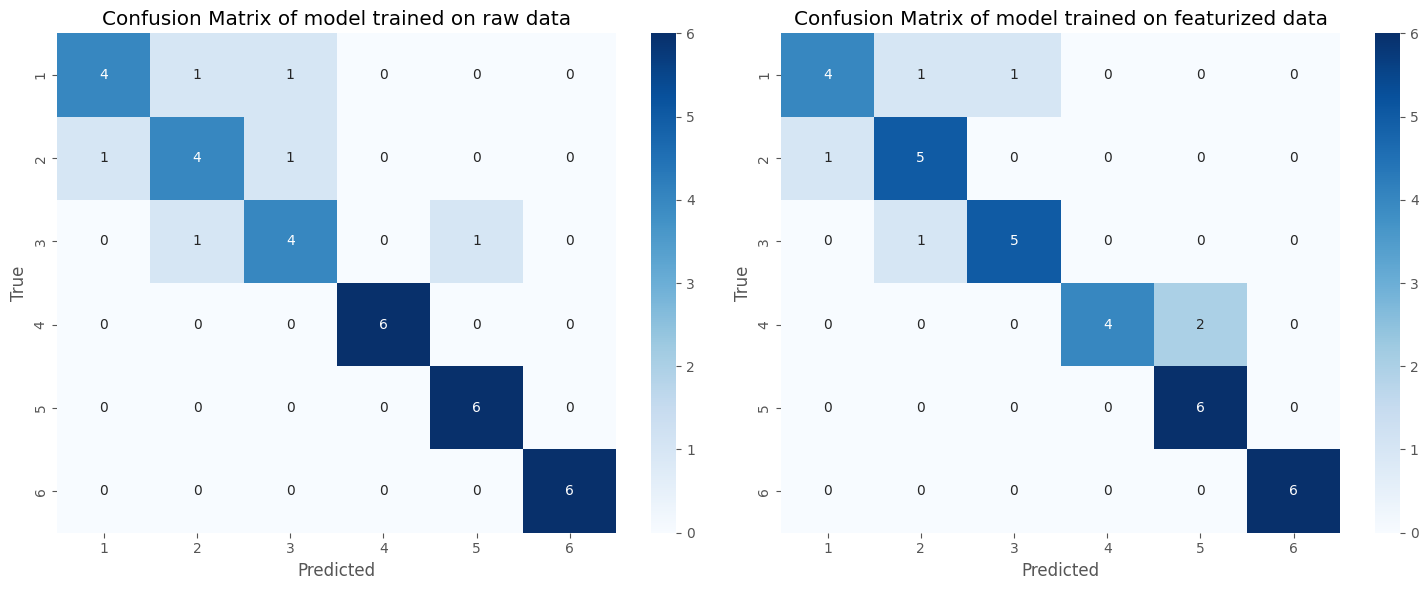

In [31]:
# Plotting accuracies of raw data and featured data
plt.plot(depths, accuracy_rawData, marker='o',label="Raw Data")
plt.plot(depths, accuracies_test, marker='x',label="Featured Data")
plt.title('Comparision of Accuracies of model trained on raw data and featured data')
plt.ylim(0,1.1)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
sns.heatmap(cm_rawData, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix of model trained on raw data')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(1,2,2)
sns.heatmap(cm_featured, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix of model trained on featurized data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout(h_pad=2)
plt.show()

# *Deployment*

1. We used the Physics Toolbox Suite app on my smartphone for data collection, ensuring consistent phone positioning and calibration for accuracy across all activities.

2. Five samples were collected per activity, each recorded for at least 15 seconds and trimmed to 10 seconds, resulting in 500 samples at a 50Hz rate.

3. Raw data was saved in .csv format for easy manipulation. Resampling adjusted any variations to a consistent 50Hz frequency using the resample method.

4. A batch process loaded data from multiple CSV files, each representing different activity classes, into individual DataFrames, which were then converted into a 3D NumPy array with each slice representing a specific activity class.

5. This 3D array, with each slice containing 500 samples and three features, was labeled manually to create a dataset ready for machine learning model testing.

6. Consistent phone alignment and minimal external interference were maintained throughout. The model's classification success was analyzed, considering the meticulous data collection process, ensuring experiment reliability and insights into real-world applicability.

In [33]:
import pandas as pd
import numpy as np
# !pip install pyarrow
# List of CSV file names
csv_files = ['.\Collected Data\standing_1.csv', '.\Collected Data\standing_2.csv', '.\\Collected Data\\standing_3.csv', '.\\Collected Data\\standing_4.csv', 
'.\Collected Data\standing_5.csv',
'.\Collected Data\sitting_1.csv', 
'.\Collected Data\sitting_2.csv', 
'.\Collected Data\sitting_3.csv', 
'.\Collected Data\sitting_4.csv', 
'.\Collected Data\sitting_5.csv', 
'.\Collected Data\laying_1.csv', 
'.\Collected Data\laying_2.csv', 
'.\Collected Data\laying_3.csv', 
'.\Collected Data\laying_4.csv', 
'.\Collected Data\laying_5.csv', 
'.\Collected Data\walking_1.csv',
'.\Collected Data\walking_2.csv',
'.\Collected Data\walking_3.csv',
'.\Collected Data\walking_4.csv',
'.\Collected Data\walking_5.csv',
'.\\Collected Data\\Up_Stairs1.csv',
'.\\Collected Data\\Up_stairs2.csv', 
'.\\Collected Data\\Up_stairs3.csv' ,
'.\\Collected Data\\Up_stairs4.csv',
'.\\Collected Data\\Up_stairs5.csv',
'.\\Collected Data\\Down_stairs1.csv',
'.\\Collected Data\\Down_stairs2.csv',
'.\\Collected Data\\Down_Stairs3.csv',
'.\\Collected Data\\Down_stairs4.csv',
'.\\Collected Data\\Down_stairs5.csv' ]
# Initializean empty list to hold dataframes
dfs = []

# Read each CSV file and append to the list
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Convert list of dataframes to 3D numpy array
collected_X_test = np.array([df.values for df in dfs])

print(collected_X_test.shape)  # Should print (30, 500, 3)
print(collected_X_test[0])
collected_y_test=np.array([5,5,5,5,5,4,4,4,4,4,6,6,6,6,6,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,])
print(collected_y_test.shape)

(30, 500, 3)
[[ 0.99543077 -0.01433846  0.14381538]
 [ 0.99123333 -0.01251111  0.15283333]
 [ 0.9921     -0.01498889  0.15946667]
 ...
 [ 0.997975   -0.0136125   0.1226    ]
 [ 0.99687778 -0.01446667  0.12561111]
 [ 0.996675   -0.0150125   0.1251375 ]]
(30,)


In [34]:
# Merging whole UCI dataset into one.
X_all=np.concatenate((X_train,X_val,X_test),axis=0)
y_all=np.concatenate((y_train,y_val,y_test),axis=0)


# Generating 1500 features be flatening raw data
X_all_flat=X_all.reshape((-1,1500))
collected_X_test_flat= collected_X_test.reshape((-1,1500)) 
# print(X_all.shape)

X_lin_acc= X_all[:,:,0]**2 + X_all[:,:,1]**2 + X_all[:,:,2]**2
collected_lin_acc= collected_X_test[:,:,0]**2 +collected_X_test[:,:,1]**2 +collected_X_test[:,:,2]**2


### *Decision Tree Trained on flatened 1500 Features*

[0.4666666666666667, 0.5333333333333333, 0.5666666666666667, 0.5666666666666667, 0.5333333333333333, 0.5, 0.5, 0.5]


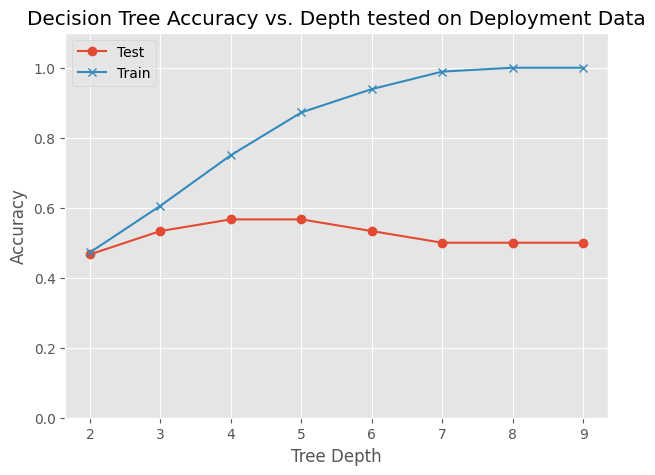

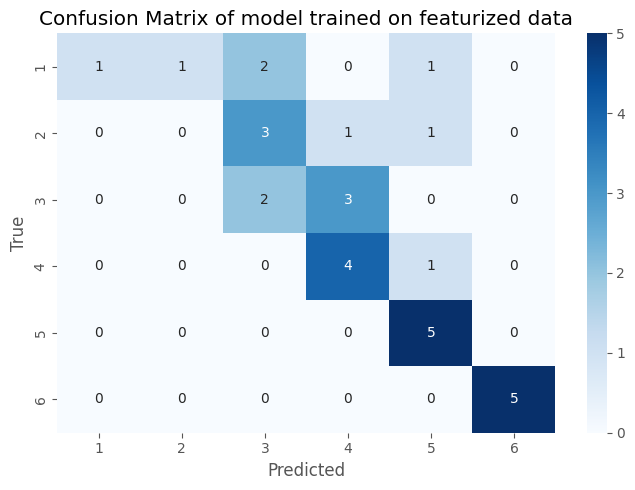

In [46]:

# Varying depths from 2 to 8
depths = list(range(2, 10))

# Lists to store accuracies and confusion matrices
accuracies_test = []
accuracies_train = []
conf_matrices = []

# Train Decision Trees with varying depths
for depth in depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_all_flat,y_all)
    
    # Calculate accuracy on train
    y_pred_train = dt_classifier.predict(X_all_flat)
    accuracy = accuracy_score(y_all, y_pred_train)
    accuracies_train.append(accuracy)
    
    #Accuracy on test
    y_pred_test = dt_classifier.predict(collected_X_test_flat)
    accuracy = accuracy_score(collected_y_test,y_pred_test)
    accuracies_test.append(accuracy)
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(collected_y_test, y_pred_test)
    conf_matrices.append(conf_matrix)


print(accuracies_test)
# Plot accuracies
plt.figure(figsize=(7,5))
plt.plot(depths, accuracies_test, marker='o',label="Test")
plt.plot(depths, accuracies_train, marker='x',label="Train")
plt.title('Decision Tree Accuracy vs. Depth tested on Deployment Data')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.ylim(0,1.1)
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
sns.heatmap(conf_matrices[np.argmax(accuracies_test)], annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5,6], yticklabels=[1,2,3,4,5,6])
plt.title('Confusion Matrix of model trained on featurized data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout(h_pad=2)
plt.show()
# dt_1500_features=DecisionTreeClassifier(max_depth=3)
# dt_1500_features.fit(X_all_flat,y_all)
# dt_1500_features.score(collected_X_train.reshape((-1,1500)),colleted_y_train)

### *Decision tree trained on 2D Linear Acceleration*

[0.3333333333333333, 0.4666666666666667, 0.4, 0.36666666666666664, 0.36666666666666664, 0.4, 0.3333333333333333, 0.3333333333333333]


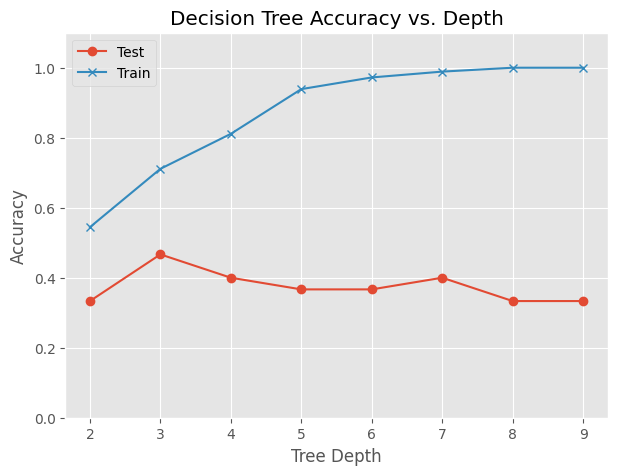

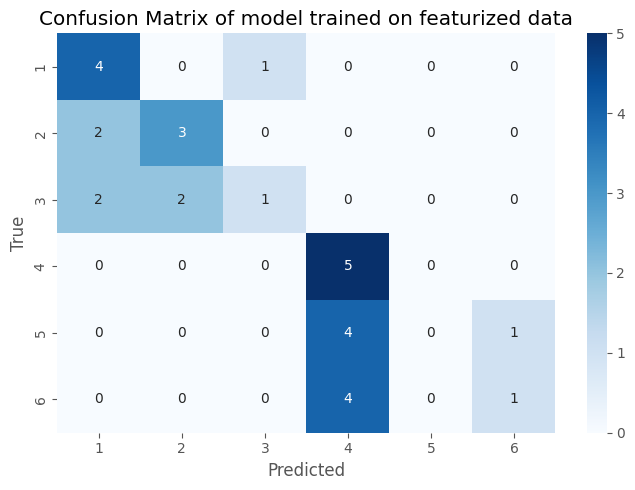

In [42]:

# Varying depths from 2 to 8
depths = list(range(2, 10))

# Lists to store accuracies and confusion matrices
accuracies_test = []
accuracies_train = []
conf_matrices = []

# Train Decision Trees with varying depths
for depth in depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_lin_acc, y_all)
    
    # Calculate accuracy on train
    y_pred_train = dt_classifier.predict(X_lin_acc)
    accuracy = accuracy_score(y_all, y_pred_train)
    accuracies_train.append(accuracy)
    
    #Accuracy on test
    y_pred_test = dt_classifier.predict(collected_lin_acc)
    accuracy = accuracy_score(collected_y_test,y_pred_test)
    accuracies_test.append(accuracy)
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(collected_y_test, y_pred_test)
    conf_matrices.append(conf_matrix)

print(accuracies_test)
# Plot accuracies
plt.figure(figsize=(7,5))
plt.plot(depths, accuracies_test, marker='o',label="Test")
plt.plot(depths, accuracies_train, marker='x',label="Train")
plt.title('Decision Tree Accuracy vs. Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.ylim(0,1.1)
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
sns.heatmap(conf_matrices[np.argmax(accuracies_test)], annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5,6], yticklabels=np.unique(y_test))
plt.title('Confusion Matrix of model trained on featurized data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout(h_pad=2)
plt.show()


### *Featurizing Collected Data using TSFEL*

In [43]:
cfg = tsfel.get_features_by_domain()
# print(total_acceleration_2d.shape)

# Extract features using TSFEL for collected dataset
print(X_all.shape)
print(X_all.reshape((-1,3)).shape)
X_extracted_train = tsfel.time_series_features_extractor(cfg, X_all.reshape((-1,3)),fs=5,window_size=500)
collected_extracted_test = tsfel.time_series_features_extractor(cfg, collected_X_test.reshape((-1,3)),fs=5,window_size=500)
print("Shape of extracted matrix ",X_extracted_train.shape)

(180, 500, 3)
(90000, 3)
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
Shape of extracted matrix  (180, 1152)


### *Decision tree trained on featurized dataset*

[0.5, 0.6666666666666666, 0.7, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667, 0.7666666666666667]


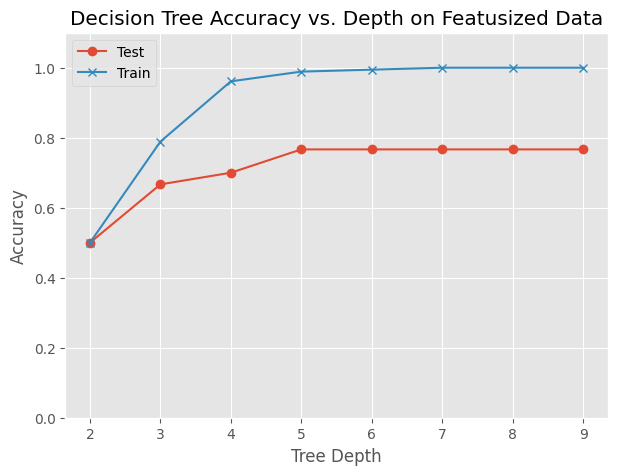

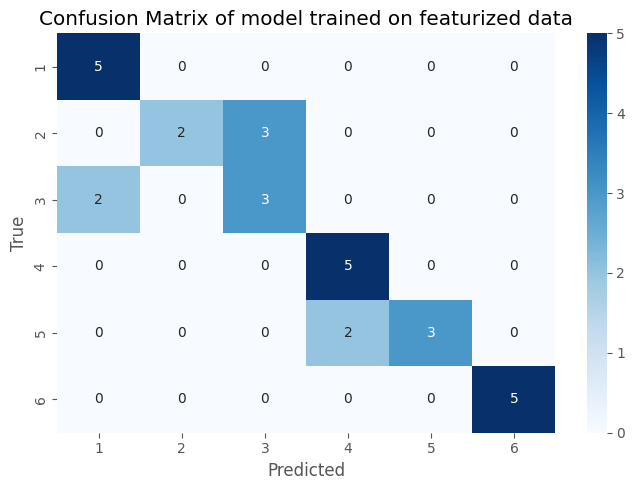

In [45]:
# Varying depths from 2 to 9
depths = list(range(2, 10))

# Lists to store accuracies and confusion matrices
accuracies_test = []
accuracies_train = []
conf_matrices = []

# Train Decision Trees with varying depths
for depth in depths:
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_extracted_train, y_all)
    

    # Calculate accuracy on train
    y_pred_train = dt_classifier.predict(X_extracted_train)
    accuracy = accuracy_score(y_all, y_pred_train)
    accuracies_train.append(accuracy)
    
    #Accuracy on test
    y_pred_test = dt_classifier.predict(collected_extracted_test)
    accuracy = accuracy_score(collected_y_test,y_pred_test)
    accuracies_test.append(accuracy)
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(collected_y_test, y_pred_test)
    conf_matrices.append(conf_matrix)

print(accuracies_test)
# Plot accuracies
plt.figure(figsize=(7,5))
plt.plot(depths, accuracies_test, marker='o',label="Test")
plt.plot(depths, accuracies_train, marker='x',label="Train")
plt.title('Decision Tree Accuracy vs. Depth on Featusized Data')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.ylim(0,1.1)
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
sns.heatmap(conf_matrices[np.argmax(accuracies_test)], annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5,6], yticklabels=[1,2,3,4,5,6])
plt.title('Confusion Matrix of model trained on featurized data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout(h_pad=2)
plt.show()
